In [1]:
from GridWorld import GridWorld
from RandomAgent import RandomAgent
from GridWorld import argmax
env = GridWorld()
agent = RandomAgent()

In [2]:
episodes = 1000

for episode in range(episodes):
    # エピソードごとにstate,agentをリセット
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state,reward,goal_done=env.step(action)

        # エージェントに履歴を追加
        agent.add(state,reward,goal_done)
        
        if goal_done:
            # エージェントの評価
            agent.eval()
            break


        # 現在の状態をstateからnext_stateに
        state = next_state

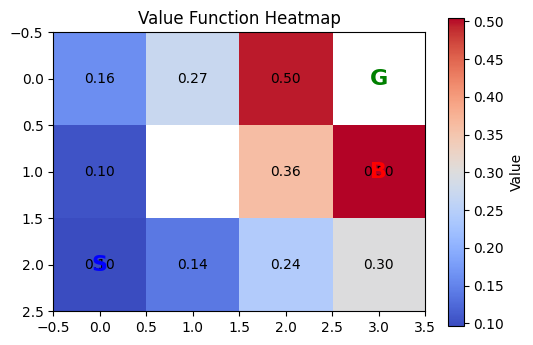

In [3]:
env.render_value_function(agent.V)

In [4]:
# greedyで最適方策を決定
gamma = 0.9
pi = env.greedy_policy(agent.V,env,gamma)

In [5]:
action_command = {
    0: "↑",   # up
    1: "↓",   # down
    2: "←",   # left
    3: "→"    # right
}

count = 0
for pos,p in pi.items():
    count += 1
    print(action_command[argmax(p)],end=" ")
    if count % 4 == 0:
        print()

→ → → ↑ 
↑ → ↑ ↑ 
→ → ↑ ↓ 


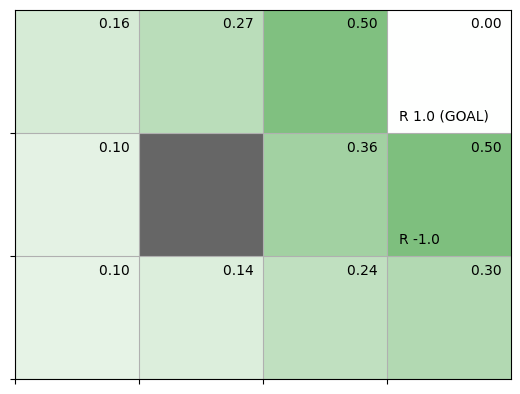

In [6]:
from Render import Renderer
renderer = Renderer(env.reward_mapping, env.goal_state,
                                    env.obstacle_state)
renderer.render_v(agent.V,policy=None,print_value=True)